In [3]:
import pandas as pd
from pathlib import Path
import logging
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_directory = Path(r'../data/')
filename = data_directory / 'preprocessed' / 'github_results.csv'
df = pd.read_csv(filename).set_index('id').drop_duplicates(subset='name')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 129 entries, 23389271.0 to 6309729.0
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         129 non-null    int64  
 1   node_id            129 non-null    object 
 2   name               129 non-null    object 
 3   full_name          129 non-null    object 
 4   private            129 non-null    bool   
 5   owner              129 non-null    object 
 6   html_url           129 non-null    object 
 7   description        129 non-null    object 
 8   fork               129 non-null    bool   
 9   url                129 non-null    object 
 10  forks_url          129 non-null    object 
 11  keys_url           129 non-null    object 
 12  collaborators_url  129 non-null    object 
 13  teams_url          129 non-null    object 
 14  hooks_url          129 non-null    object 
 15  issue_events_url   129 non-null    object 
 16  events_ur

In [6]:
ids_to_check = [
23468876,
236661502,
104569445,
148657183,
80764246,
202580388,
186872119,
275794599,
69400415,
278175856,
198119545,
261086130,
86715491,
70790978,
1678015,
62207281,
65324353,
46355863,
213480284,
247768523,
98871435,
11591264,
118264731,
123977530,
156401841,
198628357,
1885237,
184809315,
25037129,
90264407,
71996613,
64942583,
25928850,
127010483,
253993655,
18031064,
82291672,
59207352,
73872834,
110717885,
]

In [7]:
stats = df.loc[ids_to_check,['name', 'html_url', 'size', 'stargazers_count', 'forks_count']].copy()

In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 23468876 to 110717885
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              40 non-null     object 
 1   html_url          40 non-null     object 
 2   size              40 non-null     float64
 3   stargazers_count  40 non-null     float64
 4   forks_count       40 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.9+ KB


In [9]:
stats.set_index('name')['stargazers_count'].sort_values(ascending=False)

name
prophet             13013.0
statsmodels          6444.0
tsfresh              5784.0
sktime               4204.0
hmmlearn             2292.0
gluon-ts             2004.0
stumpy               1837.0
tslearn              1707.0
hypertools           1651.0
neural_prophet       1312.0
darts                1209.0
pywt                 1176.0
pyts                  993.0
pmdarima              927.0
ruptures              754.0
arch                  752.0
flow-forecast         589.0
dtaidistance          570.0
cesium                548.0
scikit-multiflow      530.0
seglearn              463.0
linearmodels          462.0
PyEMD                 454.0
pytorch-ts            440.0
sktime-dl             431.0
pydlm                 396.0
luminaire             394.0
atspy                 365.0
deltapy               357.0
mcfly                 322.0
pyaf                  310.0
banpei                248.0
tftb                  190.0
matrixprofile         169.0
pyFTS                 164.0
deeptime       

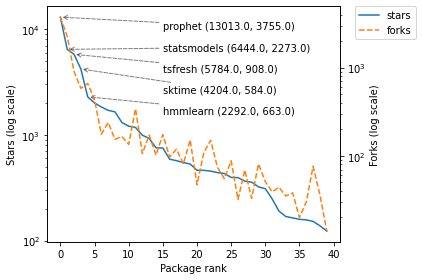

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
s = stats.set_index('name')[['stargazers_count','forks_count']].sort_values(ascending=False, by='stargazers_count')
s = s.reset_index()
#s = s[s>=1000]
hs, = ax.plot(s.index, s.stargazers_count, label='stars')
ax1 = ax.twinx()
hf, = ax1.plot(s.index, s.forks_count, linestyle='--', color='C1', label='forks')
ax.set_yscale('log')
ax1.set_yscale('log')
ax.set_xlabel('Package rank')
ax.set_ylabel('Stars (log scale)')
ax1.set_ylabel('Forks (log scale)')

# annotate the top 10 packages
top = 5
y = [10**(4-i/top) for i in range(top)]
for i in range(top):
    text = s.name.iloc[i]
    stars = s.stargazers_count.iloc[i]
    forks = s.forks_count.iloc[i]
    ax.annotate(f'{text} ({stars}, {forks})',
                xy=(i, stars), xycoords='data',
                xytext=(15, y[i]), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",
                               alpha=0.5, linestyle='--'),
                alpha=1,
                )

ax.legend(handles=[hs,hf],labels=['stars','forks'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#plt.savefig('../latex/images/distribution-stars.pdf')

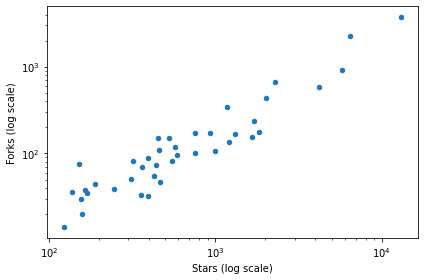

In [12]:
fig, ax = plt.subplots(figsize=(6,4))

#s = s[s>=1000]
s= stats.set_index('name')[['stargazers_count', 'forks_count']]

s.plot.scatter(x='stargazers_count', y='forks_count', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Stars (log scale)')
ax.set_ylabel('Forks (log scale)')

# annotate the top 10 packages
plt.tight_layout()
#plt.savefig('../latex/images/distribution-stars.pdf')